# Proyecto 1 - Explorando los Algoritmos de Aprendizaje Supervisado
## Juan Ignacio Navarro
## Jose David Sánchez
## Steven Badilla

### Implementación de los algoritmos de aprendizaje supervisado
* Regresión Logística

In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

class OurLogisticRegression:
    """ Logistic Regression model using numpy"""

    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        """
        Model constructor
        Inputs:
        lr -> learning rate
        num_iter -> number of iterations in model
        """
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def get_params(self, deep=True):
        """
        Get the model hyperparameters
        """
        return {"lr": self.lr, "num_iter": self.num_iter}
    
    def set_params(self, **params):
        """
        Set the model hyperparameters
        """
        for parameter, value in params.items():
            setattr(self, parameter, value)
        return self
       

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        """
        Activation function sigmoid
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Training function that changes the w and b values progressively using
        descend gradient
        """
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        """
        Predict probability given by the model using sigmoid function
        """
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold=0.5):
        """
        Get the result the prediction of a set of data by comparing the threshold
        """
        return self.predict_prob(X) >= threshold
    
    def score(self, X, y):
        """
        Score the values obtained
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy
    
    # model metrics

    def accurancy(self, y_pred,y_test):
        return accuracy_score(y_test, y_pred)
    
    def precision(self, y_pred,y_test):
        return precision_score(y_test, y_pred)
    
    def recall(self, y_pred,y_test):
        return recall_score(y_test, y_pred)
    
    def auc(self, y_pred,y_test):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc
    
    def plot_roc(self, fpr, tpr, title):
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1-Especificity')
        plt.ylabel('Sensibility')
        plt.title(title)
        plt.show()

* Árboles de decisión

In [410]:
# Algoritmo de árboles de decision

* KNN

In [411]:
class OurKNearestNeighbors():
    def __init__(self, n_neighbors=2):

        self.X_train = 0.0
        self.y_train = 0.0

        self.n_neighbors = n_neighbors

    def get_params(self, deep=True):
        return {'n_neighbors': self.n_neighbors}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def minkowski_distance(self, a, b, p=10):
        return np.power(np.sum(np.power(np.abs(a - b), p), axis=1), 1/p)

    def kneighbors(self, X_test):

        dist = []
        neigh_ind = []
        point_dist = []

        for x_test in X_test:
            point_dist += [ self.minkowski_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        return np.array(neigh_ind)

    def predict(self, X_test):

        neighbors = self.kneighbors(X_test)
        y_pred = np.array([
            np.argmax(np.bincount(self.y_train[neighbor]))
            for neighbor in neighbors
        ])
        return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test

    # model metrics

    def accurancy(self, y_pred,y_test):
        return accuracy_score(y_test, y_pred)
    
    def precision(self, y_pred,y_test):
        return precision_score(y_test, y_pred)
    
    def recall(self, y_pred,y_test):
        return recall_score(y_test, y_pred)
        
    def auc(self, y_pred,y_test):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc
    
    def plot_roc(self, fpr, tpr, title):
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1-Especificity')
        plt.ylabel('Sensibility')
        plt.title(title)
        plt.show()

### Prueba de los algoritmos con set de datos

* Set de datos de Red Wine Quality

In [412]:
# read the data set
df_wine = pd.read_csv('datasets/winequality-red.csv')

# make sure that there are no null values that can affect the models
mask = df_wine.isnull()
#print(mask.sum())

# visualizing the values of each feature and the comparison to the output
# (not ploting to avoid data overload in the notebook)
"""
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()
"""

# Data preprocessing - outliner treatment
# eliminating data that is outside the normal values in each feature
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
l_limit_perc = 0.01
h_limit_perc = 0.99

for feature in features:
    low_limit = df_wine[feature].quantile(l_limit_perc)
    high_limit = df_wine[feature].quantile(h_limit_perc)
    df_wine = df_wine.loc[(df_wine[feature] >= low_limit) & (df_wine[feature] <= high_limit)]

# visualizing the new values
# (not ploting to avoid data overload in the notebook)
"""
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()
"""

# feature engineering
# normalization of the data
for feature in features:
    df_wine[feature] = (df_wine[feature]-df_wine[feature].mean())/df_wine[feature].std()

# change the value of the output to only two values
# 0 -> bad wine, wines with 3, 4 and 5 in quality
# 1 -> good wine, wines with 6, 7 and 8 in queality
df_wine.loc[df_wine['quality'] <= 5, 'quality'] = 0
df_wine.loc[df_wine['quality'] > 5, 'quality'] = 1

# Define training and test sets using stratify
X0 = df_wine.loc[df_wine['quality'] == 0, features]
Y0 = df_wine.loc[df_wine['quality'] == 0, 'quality']

X1 = df_wine.loc[df_wine['quality'] == 1, features]
Y1 = df_wine.loc[df_wine['quality'] == 1, 'quality']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=0.4, random_state=40)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.4, random_state=40)

X_train = pd.concat([X0_train, X1_train], axis= 0)
y_train = pd.concat([y0_train, y1_train], axis= 0)

df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.565253,1.059618,-1.411229,-0.553438,-0.287522,-0.479510,-0.355404,0.672341,1.474535,-0.638760,-1.000675,0
1,-0.304938,2.161772,-1.411229,0.207560,0.571559,1.031186,0.767153,0.024570,-0.872713,0.332310,-0.574418,0
2,-0.304938,1.427003,-1.193394,-0.118582,0.337264,-0.047882,0.324934,0.154124,-0.418407,0.089543,-0.574418,0
3,1.907741,-1.512074,1.638460,-0.553438,-0.326572,0.167932,0.529035,0.801895,-1.175584,-0.476915,-0.574418,1
4,-0.565253,1.059618,-1.411229,-0.553438,-0.287522,-0.479510,-0.355404,0.672341,1.474535,-0.638760,-1.000675,0
5,-0.565253,0.814695,-1.411229,-0.662152,-0.326572,-0.263696,-0.151302,0.672341,1.474535,-0.638760,-1.000675,0
6,-0.239859,0.447311,-1.084476,-0.879580,-0.560867,-0.047882,0.495018,-0.234539,-0.115536,-1.447985,-1.000675,0
8,-0.304938,0.324849,-1.302311,-0.444724,-0.404670,-0.695323,-0.899674,0.024570,0.338770,-0.557837,-0.894111,1
9,-0.500174,-0.164997,0.549286,4.012548,-0.482768,0.167932,1.957744,0.672341,0.263052,1.303380,0.171531,0
10,-1.020805,0.324849,-0.975559,-0.662152,0.532510,-0.047882,0.699120,-0.558425,-0.266972,-0.800605,-1.213804,0


    - Prueba con Regresión Logística

In [413]:
"""# initial variables
test_percentages = [0.1, 0.25, 0.50, 0.75, 0.9, 1]
y_tests = {'our_model': [], 'sklearn_model': []}
y_preds = {'our_model': [], 'sklearn_model': []}
accurancies = {'our_model': [], 'sklearn_model': []}
precisions = {'our_model': [], 'sklearn_model': []}
recalls = {'our_model': [], 'sklearn_model': []}
num_rows = min(X0_test.shape[0], X1_test.shape[0])

# Get the bes model hyperparameters
model = OurLogisticRegression()
param_grid = {'lr': [0.001, 0.05, 0.01],
              'num_iter': [100, 1000, 10000]}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Instantiate model with the best hyperparameters
model = OurLogisticRegression(lr=0.001, num_iter=100)
model.fit(X_train, y_train)

# Instantiate sklearn logistic regression model
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)

# get testing metrics by using different amount of tests
for test_percentage in test_percentages:

    # get the amount of data needed for each percentage
    n_tests = int(num_rows * test_percentage)
    X0_test_i = X0_test.iloc[:n_tests, :]
    X1_test_i = X1_test.iloc[:n_tests, :]
    y0_test_i = y0_test.iloc[:n_tests]
    y1_test_i = y1_test.iloc[:n_tests]

    X_test_i = pd.concat([X0_test_i, X1_test_i], axis= 0)
    y_test_i = pd.concat([y0_test_i, y1_test_i], axis= 0)
    y_tests['our_model'].append(y_test_i)
    y_tests['sklearn_model'].append(y_test_i)

    ## Predictions for out model
    # predict probabilities for test set
    probs = model.predict_prob(X_test_i)

    # predict classes for test set
    y_pred_i = model.predict(X_test_i, 0.5)
    y_preds['our_model'].append(y_pred_i)

    # get the metrics
    accurancies['our_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['our_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['our_model'].append(model.recall(y_pred_i, y_test_i))

    ## Predictions for sklearn model
    y_pred_i = model_sklearn.predict(X_test_i)
    y_preds['sklearn_model'].append(y_pred_i)

    # get the metrics
    accurancies['sklearn_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['sklearn_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['sklearn_model'].append(model.recall(y_pred_i, y_test_i))

# draw ROC curve
fpr_model = np.array([0., 1.])
tpr_model = np.array([0., 1.])
fpr_sk = np.array([0., 1.])
tpr_sk = np.array([0., 1.])
aucs = {'our_model': [], 'sklearn_model': []}
for i in range(len(test_percentages)):
    fpr_i, tpr_i, auc_i = model.auc(y_preds['sklearn_model'][i], y_tests['sklearn_model'][i])
    fpr_sk = np.insert(fpr_sk, -1, fpr_i[1])
    tpr_sk = np.insert(tpr_sk, -1, tpr_i[1])
    aucs['sklearn_model'].append(auc_i)

    fpr_i, tpr_i, auc_i = model.auc(y_preds['our_model'][i], y_tests['our_model'][i])
    fpr_model = np.insert(fpr_model, -1, fpr_i[1])
    tpr_model = np.insert(tpr_model, -1, tpr_i[1])
    aucs['our_model'].append(auc_i)

    

# display test metric results
title_row = ['Amount of tests','Model', 'Accurancy', 'Precision', 'Recall', 'Auc']
df_results = pd.DataFrame(columns=title_row)

for i, test_percentage in enumerate(test_percentages):
    row = [int(test_percentage*num_rows), 'Our model', accurancies['our_model'][i], precisions['our_model'][i], recalls['our_model'][i], aucs['our_model'][i]]
    df_results.loc[len(df_results)] = row
    row = [int(test_percentage*num_rows), 'Sklearn model', accurancies['sklearn_model'][i], precisions['sklearn_model'][i], recalls['sklearn_model'][i], aucs['sklearn_model'][i]]
    df_results.loc[len(df_results)] = row

print(df_results)
model.plot_roc(fpr_model, tpr_model, 'ROC curve for our logistic regression model')
model.plot_roc(fpr_sk, tpr_sk, 'ROC curve for sklearn logistic regression model')
"""


'# initial variables\ntest_percentages = [0.1, 0.25, 0.50, 0.75, 0.9, 1]\ny_tests = {\'our_model\': [], \'sklearn_model\': []}\ny_preds = {\'our_model\': [], \'sklearn_model\': []}\naccurancies = {\'our_model\': [], \'sklearn_model\': []}\nprecisions = {\'our_model\': [], \'sklearn_model\': []}\nrecalls = {\'our_model\': [], \'sklearn_model\': []}\nnum_rows = min(X0_test.shape[0], X1_test.shape[0])\n\n# Get the bes model hyperparameters\nmodel = OurLogisticRegression()\nparam_grid = {\'lr\': [0.001, 0.05, 0.01],\n              \'num_iter\': [100, 1000, 10000]}\ngrid_search = GridSearchCV(model, param_grid, cv=5)\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best hyperparameters: ", grid_search.best_params_)\n\n# Instantiate model with the best hyperparameters\nmodel = OurLogisticRegression(lr=0.001, num_iter=100)\nmodel.fit(X_train, y_train)\n\n# Instantiate sklearn logistic regression model\nmodel_sklearn = LogisticRegression()\nmodel_sklearn.fit(X_train, y_train)\n\n# get testing me

    - Prueba con Árbol de Decisión

    - Prueba con KNN

    Amount of tests          Model  Accurancy  Precision    Recall       Auc
0                25      Our model   0.780000   0.750000  0.840000  0.780000
1                25  Sklearn model   0.780000   0.750000  0.840000  0.780000
2                63      Our model   0.746032   0.701299  0.857143  0.746032
3                63  Sklearn model   0.722222   0.675000  0.857143  0.722222
4               126      Our model   0.730159   0.688312  0.841270  0.730159
5               126  Sklearn model   0.694444   0.652174  0.833333  0.694444
6               189      Our model   0.706349   0.674107  0.798942  0.706349
7               189  Sklearn model   0.706349   0.672566  0.804233  0.706349
8               226      Our model   0.703540   0.671642  0.796460  0.703540
9               226  Sklearn model   0.703540   0.669118  0.805310  0.703540
10              252      Our model   0.710317   0.679054  0.797619  0.710317
11              252  Sklearn model   0.704365   0.671096  0.801587  0.704365

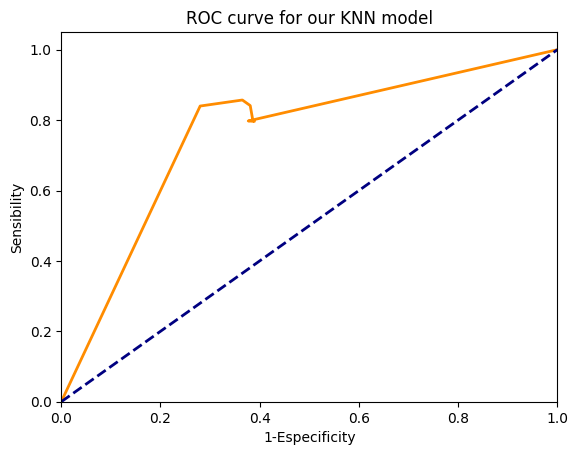

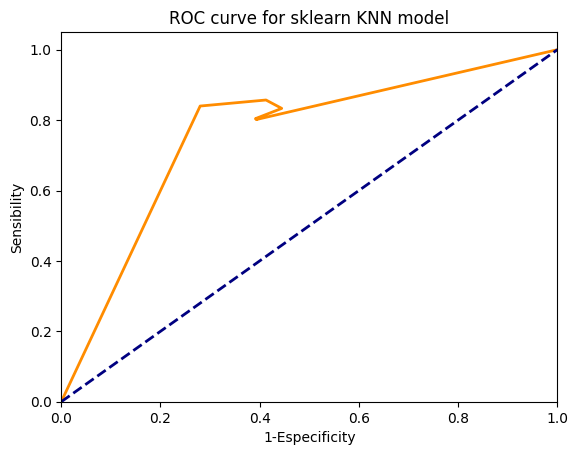

In [414]:
# initial variables
test_percentages = [0.1, 0.25, 0.50, 0.75, 0.9, 1]
y_tests = {'our_model': [], 'sklearn_model': []}
y_preds = {'our_model': [], 'sklearn_model': []}
accurancies = {'our_model': [], 'sklearn_model': []}
precisions = {'our_model': [], 'sklearn_model': []}
recalls = {'our_model': [], 'sklearn_model': []}
num_rows = min(X0_test.shape[0], X1_test.shape[0])

# Instantiate model with the best hyperparameters
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()

k = 35

model = OurKNearestNeighbors(k)
model.fit(X_train, y_train)
model_sklearn = KNeighborsClassifier(n_neighbors=k)
model_sklearn.fit(X_train, y_train)

# get testing metrics by using different amount of tests
for test_percentage in test_percentages:

    # get the amount of data needed for each percentage
    n_tests = int(num_rows * test_percentage)
    X0_test_i = X0_test.iloc[:n_tests, :]
    X1_test_i = X1_test.iloc[:n_tests, :]
    y0_test_i = y0_test.iloc[:n_tests]
    y1_test_i = y1_test.iloc[:n_tests]

    X_test_i = pd.concat([X0_test_i, X1_test_i], axis= 0)
    y_test_i = pd.concat([y0_test_i, y1_test_i], axis= 0)
    y_tests['our_model'].append(y_test_i)
    y_tests['sklearn_model'].append(y_test_i)

    ## Predictions for out model
    # predict classes for test set
    if isinstance(X_test_i, pd.DataFrame):
        X_test_i = X_test_i.to_numpy()
        
    y_pred_i = model.predict(X_test_i)
    y_pred_i = pd.DataFrame(y_pred_i)

    y_preds['our_model'].append(y_pred_i)

    # get the metrics
    accurancies['our_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['our_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['our_model'].append(model.recall(y_pred_i, y_test_i))

    ## Predictions for sklearn model
    y_pred_i = model_sklearn.predict(X_test_i)
    y_preds['sklearn_model'].append(y_pred_i)

    # get the metrics
    accurancies['sklearn_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['sklearn_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['sklearn_model'].append(model.recall(y_pred_i, y_test_i))

# draw ROC curve
fpr_model = np.array([0., 1.])
tpr_model = np.array([0., 1.])
fpr_sk = np.array([0., 1.])
tpr_sk = np.array([0., 1.])
aucs = {'our_model': [], 'sklearn_model': []}
for i in range(len(test_percentages)):
    fpr_i, tpr_i, auc_i = model.auc(y_preds['sklearn_model'][i], y_tests['sklearn_model'][i])
    fpr_sk = np.insert(fpr_sk, -1, fpr_i[1])
    tpr_sk = np.insert(tpr_sk, -1, tpr_i[1])
    aucs['sklearn_model'].append(auc_i)

    fpr_i, tpr_i, auc_i = model.auc(y_preds['our_model'][i], y_tests['our_model'][i])
    fpr_model = np.insert(fpr_model, -1, fpr_i[1])
    tpr_model = np.insert(tpr_model, -1, tpr_i[1])
    aucs['our_model'].append(auc_i)

# display test metric results
title_row = ['Amount of tests','Model', 'Accurancy', 'Precision', 'Recall', 'Auc']
df_results = pd.DataFrame(columns=title_row)

for i, test_percentage in enumerate(test_percentages):
    row = [int(test_percentage*num_rows), 'Our model', accurancies['our_model'][i], precisions['our_model'][i], recalls['our_model'][i], aucs['our_model'][i]]
    df_results.loc[len(df_results)] = row
    row = [int(test_percentage*num_rows), 'Sklearn model', accurancies['sklearn_model'][i], precisions['sklearn_model'][i], recalls['sklearn_model'][i], aucs['sklearn_model'][i]]
    df_results.loc[len(df_results)] = row

print(df_results)
model.plot_roc(fpr_model, tpr_model, 'ROC curve for our KNN model')
model.plot_roc(fpr_sk, tpr_sk, 'ROC curve for sklearn KNN model')

* Set de datos de notas del curso de Arquitectura de Computadores I

In [415]:
# read first data set
df_2021_s1_grades = pd.read_csv('datasets/2021-s1.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2021_s1_grades.isnull()
#print(mask.sum())

df_2021_s1_grades = df_2021_s1_grades.drop('Tarea 2 Entrega 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Proyecto Individual Viernes 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Proyecto Individual Lunes 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Exposición', axis=1)

# Arranging cols
col_Investi = df_2021_s1_grades.pop('Total: Investigación 5.0%')  # Cut col
df_2021_s1_grades.insert(14, 'Total: Investigación 5.0%', col_Investi)  # Insert col

In [416]:
# read second data set
df_2021_s2_grades = pd.read_csv('datasets/2021-s2.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2021_s2_grades.isnull()
#print(mask.sum())

df_2021_s2_grades = df_2021_s2_grades.drop('Examen 2 Práctico Ext 0.25%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Proyecto Individual Entrega V 0.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Proyecto Individual Entrega M 0.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Entrega', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 1', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 2', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 3', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 4', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Total: Extra 2.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Total: Extra 5 noviembre 1.0%', axis=1)

In [417]:
# read third data set
df_2022_s1_grades = pd.read_csv('datasets/2022-s1.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2022_s1_grades.isnull()
#print(mask.sum())

# delete students from robot project (only 6 in the whole data set)
df_2022_s1_grades = df_2022_s1_grades.drop([0, 4, 10, 20, 22, 26]) 

df_2022_s1_grades = df_2022_s1_grades.drop('Tarea 1 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Individual Entrega V 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Individual Entrega L 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grupal 2 Anteproyecto 1.75%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grup 2 Funcional Rob 11.38%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grupal 2 Docu Robot 4.37%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Entrega 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Evaluación 5.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Evaluación', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Total: Puntaje extra 2%', axis=1)

# Arranging cols
col_Tarea2 = df_2022_s1_grades.pop('Tarea 2 3.75%')  # Cut col
df_2022_s1_grades.insert(5, 'Tarea 2 3.75%', col_Tarea2)  # Insert col

In [418]:
# read fourth data set
df_2022_s2_grades = pd.read_csv('datasets/2022-s2.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2022_s2_grades.isnull()
#print(mask.sum())

df_2022_s2_grades = df_2022_s2_grades.drop('Examen parcial 2 práctico repo 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Examen parcial 2 prác rep eval 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Tarea 2 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 2 Anteproyecto 1.75%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 1 Func Eval 13.12%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 1 Docu Eval 4.38%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Entrega', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Charla 1 Simics 0.5%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Charla 2 Ronald 0.5%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Taller Simics 2%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Extra proyecto 1.75%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Total: Extra 4.75%', axis=1)

In [419]:
# Merging four datasets frames into one frame

df_2021_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
df_2022_s1_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
df_2022_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)

df_arqui = pd.concat([df_2021_s1_grades, df_2021_s2_grades, df_2022_s1_grades, df_2022_s2_grades], axis=0, ignore_index=True)

df_arqui.replace(r'^\s*$', np.nan,regex=True, inplace=True)
df_arqui.fillna(0.0, inplace=True)
df_arqui = df_arqui.drop('Final', axis=1)


# Data preprocessing - outliner treatment
# eliminating data that is outside the normal values in each feature
features = ['Examen 1 15.0%', 
            'Examen 2 Práctico 5.0%', 
            'Examen 2 Teórico 10.0%', 
            'Total: Exámenes 30.0%', 
            'Tarea 1 3.75%', 
            'Tarea 2 Evaluación 3.75%', 
            'Total: Tareas 7.5%', 
            'Proyecto Individual Docu 3.75%', 
            'Proyecto Individual Funcional 11.25%', 
            'Proyecto Grupal 1 Funcional 13.12%',
            'Proyecto Grupal 1 Docu 4.38%',
            'Proyecto Grupal 2 Funcional 13.12%',
            'Proyecto Grupal 2 Docu 4.38%',
            'Total: Proyectos 50.0%',
            'Total: Investigación 5.0%',
            'Taller 1',
            'Taller 2',
            'Taller 3',
            'Taller 4',
            'Taller 5',
            'Total: Taller 7.5%']

l_limit_perc = 0.01
h_limit_perc = 0.99

df_arqui = df_arqui.astype(float)

for feature in features:
    low_limit = df_arqui[feature].quantile(l_limit_perc)
    high_limit = df_arqui[feature].quantile(h_limit_perc)
    df_arqui = df_arqui.loc[(df_arqui[feature] >= low_limit) & (df_arqui[feature] <= high_limit)]

# feature engineering
# normalization of the data
for feature in features:
    df_arqui[feature] = (df_arqui[feature]-df_arqui[feature].mean())/df_arqui[feature].std()

# change the value of the output to only two values
# 0 -> Student failed, less than 67.5 as final grade
# 1 -> Student passed, great or equal than 67.5 as final grade
df_arqui.loc[df_arqui['Total: '] <= 67.5, 'Total: '] = 0
df_arqui.loc[df_arqui['Total: '] > 67.5, 'Total: '] = 1

# Define training and test sets using stratify
X0 = df_arqui.loc[df_arqui['Total: '] == 0, features]
Y0 = df_arqui.loc[df_arqui['Total: '] == 0, 'Total: ']

X1 = df_arqui.loc[df_arqui['Total: '] == 1, features]
Y1 = df_arqui.loc[df_arqui['Total: '] == 1, 'Total: ']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=0.4, random_state=40)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.4, random_state=40)

X_train = pd.concat([X0_train, X1_train], axis= 0)
y_train = pd.concat([y0_train, y1_train], axis= 0)

df_arqui.head(5)

/tmp/ipykernel_346490/2703026304.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2021_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
/tmp/ipykernel_346490/2703026304.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2022_s1_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
/tmp/ipykernel_346490/2703026304.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2022_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)


,Examen 1 15.0%,Examen 2 Práctico 5.0%,Examen 2 Teórico 10.0%,Total: Exámenes 30.0%,Tarea 1 3.75%,Tarea 2 Evaluación 3.75%,Total: Tareas 7.5%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,...,Proyecto Grupal 2 Docu 4.38%,Total: Proyectos 50.0%,Total: Investigación 5.0%,Taller 1,Taller 2,Taller 3,Taller 4,Taller 5,Total: Taller 7.5%,Total:
0,0.608534,-1.162069,-0.030399,-0.009979,0.823093,0.603086,0.835132,0.052219,1.151204,1.187786,...,0.188374,0.915790,0.544830,0.232150,0.852475,0.727088,-1.480341,1.074001,0.168250,1.0
1,-1.326258,-1.542372,-1.588984,-1.771099,-1.234709,-2.077296,-1.943578,-1.923581,-1.802788,-2.087235,...,-1.928273,-2.074044,-1.890585,-0.995520,-1.750624,-1.751650,-1.480341,-1.060796,-1.804104,0.0
2,0.432644,1.360705,0.236939,1.700783,1.472926,-2.077296,-0.364765,0.642393,1.151204,-0.613475,...,0.188374,0.353150,0.544830,0.845984,0.852475,0.727088,0.799638,-1.060796,0.284271,1.0
3,-1.925235,-1.542372,-1.588984,-2.035476,-1.234709,-2.077296,-1.943578,-1.923581,-1.802788,-2.087235,...,-1.928273,-2.074044,-1.890585,-2.223189,-1.750624,-1.751650,-1.480341,-1.060796,-2.036146,0.0
4,1.003098,-1.542372,-0.030399,0.072551,0.571283,0.603086,0.687776,0.642393,1.151204,1.187786,...,0.188374,0.968904,0.544830,0.845984,0.852475,-0.841953,0.799638,1.074001,0.496976,1.0


    - Prueba con Regresión Logística

Best hyperparameters:  {'lr': 0.05, 'num_iter': 10000}
    Amount of tests          Model  Accurancy  Precision    Recall       Auc
0                 1      Our model   1.000000   1.000000  1.000000  1.000000
1                 1  Sklearn model   1.000000   1.000000  1.000000  1.000000
2                 3      Our model   1.000000   1.000000  1.000000  1.000000
3                 3  Sklearn model   1.000000   1.000000  1.000000  1.000000
4                 6      Our model   1.000000   1.000000  1.000000  1.000000
5                 6  Sklearn model   1.000000   1.000000  1.000000  1.000000
6                 9      Our model   0.944444   1.000000  0.888889  0.944444
7                 9  Sklearn model   1.000000   1.000000  1.000000  1.000000
8                11      Our model   0.909091   0.909091  0.909091  0.909091
9                11  Sklearn model   1.000000   1.000000  1.000000  1.000000
10               13      Our model   0.923077   0.923077  0.923077  0.923077
11               13  

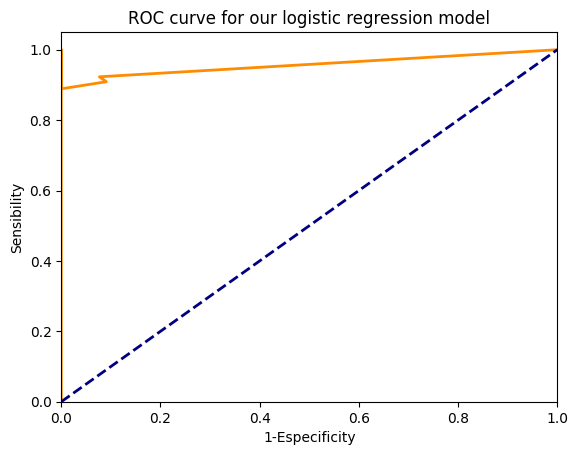

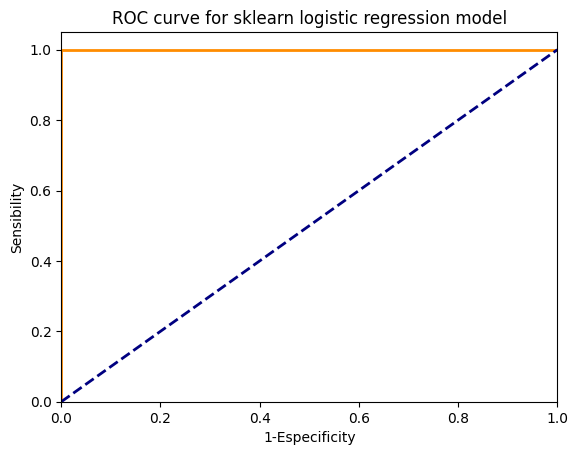

In [420]:
# initial variables
test_percentages = [0.1, 0.25, 0.50, 0.75, 0.9, 1]
y_tests = {'our_model': [], 'sklearn_model': []}
y_preds = {'our_model': [], 'sklearn_model': []}
accurancies = {'our_model': [], 'sklearn_model': []}
precisions = {'our_model': [], 'sklearn_model': []}
recalls = {'our_model': [], 'sklearn_model': []}
num_rows = min(X0_test.shape[0], X1_test.shape[0])

# Get the bes model hyperparameters
model = OurLogisticRegression()
param_grid = {'lr': [0.001, 0.05, 0.01],
              'num_iter': [100, 1000, 10000]}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Instantiate model with the best hyperparameters
model = OurLogisticRegression(lr=0.001, num_iter=100)
model.fit(X_train, y_train)

# Instantiate sklearn logistic regression model
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)

# get testing metrics by using different amount of tests
for test_percentage in test_percentages:

    # get the amount of data needed for each percentage
    n_tests = int(num_rows * test_percentage)
    X0_test_i = X0_test.iloc[:n_tests, :]
    X1_test_i = X1_test.iloc[:n_tests, :]
    y0_test_i = y0_test.iloc[:n_tests]
    y1_test_i = y1_test.iloc[:n_tests]

    X_test_i = pd.concat([X0_test_i, X1_test_i], axis= 0)
    y_test_i = pd.concat([y0_test_i, y1_test_i], axis= 0)
    y_tests['our_model'].append(y_test_i)
    y_tests['sklearn_model'].append(y_test_i)

    ## Predictions for out model
    # predict probabilities for test set
    probs = model.predict_prob(X_test_i)

    # predict classes for test set
    y_pred_i = model.predict(X_test_i, 0.5)
    y_preds['our_model'].append(y_pred_i)

    # get the metrics
    accurancies['our_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['our_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['our_model'].append(model.recall(y_pred_i, y_test_i))

    ## Predictions for sklearn model
    y_pred_i = model_sklearn.predict(X_test_i)
    y_preds['sklearn_model'].append(y_pred_i)

    # get the metrics
    accurancies['sklearn_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['sklearn_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['sklearn_model'].append(model.recall(y_pred_i, y_test_i))

# draw ROC curve
fpr_model = np.array([0., 1.])
tpr_model = np.array([0., 1.])
fpr_sk = np.array([0., 1.])
tpr_sk = np.array([0., 1.])
aucs = {'our_model': [], 'sklearn_model': []}
for i in range(len(test_percentages)):
    fpr_i, tpr_i, auc_i = model.auc(y_preds['sklearn_model'][i], y_tests['sklearn_model'][i])
    fpr_sk = np.insert(fpr_sk, -1, fpr_i[1])
    tpr_sk = np.insert(tpr_sk, -1, tpr_i[1])
    aucs['sklearn_model'].append(auc_i)

    fpr_i, tpr_i, auc_i = model.auc(y_preds['our_model'][i], y_tests['our_model'][i])
    fpr_model = np.insert(fpr_model, -1, fpr_i[1])
    tpr_model = np.insert(tpr_model, -1, tpr_i[1])
    aucs['our_model'].append(auc_i)

# display test metric results
title_row = ['Amount of tests','Model', 'Accurancy', 'Precision', 'Recall', 'Auc']
df_results = pd.DataFrame(columns=title_row)

for i, test_percentage in enumerate(test_percentages):
    row = [int(test_percentage*num_rows), 'Our model', accurancies['our_model'][i], precisions['our_model'][i], recalls['our_model'][i], aucs['our_model'][i]]
    df_results.loc[len(df_results)] = row
    row = [int(test_percentage*num_rows), 'Sklearn model', accurancies['sklearn_model'][i], precisions['sklearn_model'][i], recalls['sklearn_model'][i], aucs['sklearn_model'][i]]
    df_results.loc[len(df_results)] = row

print(df_results)
model.plot_roc(fpr_model, tpr_model, 'ROC curve for our logistic regression model')
model.plot_roc(fpr_sk, tpr_sk, 'ROC curve for sklearn logistic regression model')

    - Prueba con Árbol de Decisión

In [421]:
# Test for DT goes here

    - Prueba con KNN

In [422]:
# Test goes here - KNN

* Set de datos a elegir

In [423]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

    - Prueba con Regresión Logística

In [424]:
# Test for LR goes here

    - Prueba con Árbol de Decisión

In [425]:
# Test for DT goes here

    - Prueba con KNN

In [426]:
# Test for KNN goes here

### Puntos extra: modelo que precide la nota del estudiante (utilizando el set de datos de Arquitectura de Computadores I)

La predicción está basada en las notas del proyecto 1, proyecto 2, examen 1 y taller 1.